# Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movie.csv')

In [3]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.shape

(40000, 2)

In [5]:
df.sample()['text'].values

array(["As perhaps one of the few Canadians who did not read the book in high school, I thought I would add my comments. Seeing the movie without knowing the story beforehand in no way detracted from the film. The characters have so many complexities, everyone can relate to them in their own way. The brilliance of the adaptation is that everyone is allowed to project their own perceptions onto the lives of the characters, rather than being spoon-fed an opinion. You can love them or dislike them, and still feel the emotional impact of the movie. Wonderful performances by Ellen Burstyn and Christine Horne really bring the characters to life. I'd highly recommend it."],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.isna().sum()

text     0
label    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(277)

In [10]:
df[df.duplicated()]

,text,label
2164,"I find it rather useless to comment on this ""m...",0
3236,An absolutely atrocious adaptation of the wond...,0
3428,When I first saw this film it was not an impre...,0
3652,Before I watched this tv movie I did not know ...,1
3787,What a clunker!<br /><br />It MUST have been m...,0
...,...,...
39229,I Enjoyed Watching This Well Acted Movie Very ...,1
39246,You do realize that you've been watching the E...,0
39508,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
39681,It's been a long time since I last saw a movie...,0


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df[(df['text'].str.strip() == "")]

,text,label


In [14]:
df['text'] = df['text'].str.lower()

In [15]:
df.head()

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [16]:
df[df['text'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,text,label


In [17]:
url = r'(https?://\S+|www\.\S+)'
text_url = df[df['text'].str.contains(url, regex=True)]

C:\Users\iamha\AppData\Local\Temp\ipykernel_4004\3275997062.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  text_url = df[df['text'].str.contains(url, regex=True)]


In [18]:
text_url.head()

,text,label
205,"i just saw this movie on hbo, and it was reall...",1
661,inarguably one of the most interesting filmmak...,1
1049,"i really love this movie , i saw it for the fi...",1
1241,"call me stupid, but i absolutely loved the 200...",1
1786,i'm a big fan of the first critters movie. the...,0


In [19]:
text_url.sample()['text'].values

array(['inarguably one of the most interesting filmmakers of the last 50 years, werner herzog has been pushing the boundaries of cinema perhaps more so than any other commercial filmmaker. i\'ve been acquainted with herzog for a few decades now and i\'ve never not been impressed by both the man and his work. last year i went to see rescue dawn and was somewhat surprised at how relatively mainstream the film was, yet couldn\'t help but imagine herzog taking his actors and crew into the actual jungle to not only make the film, but to live it. no other filmmaker is as crazed about the purity of the film-making process and the subsequent lore from such productions as fitzcarraldo has been forged into cinematic legend.<br /><br />today i sat down to fata morgana, a 1969 herzog film that could be described as an allegorical filmic postcard. without researching the actual locations, i\'m assuming it was shot somewhere in africa, both coastal and desert, a region that could have once been the 

In [20]:
text_url.shape

(149, 2)

In [21]:
df = df[~df['text'].str.contains(url, regex=True)]

C:\Users\iamha\AppData\Local\Temp\ipykernel_4004\456587084.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['text'].str.contains(url, regex=True)]


In [22]:
df.shape

(39574, 2)

In [23]:
text_new = df[df['text'].str.contains('\n')]
text_new.shape

(0, 2)

In [24]:
text_br = df[df['text'].str.contains('<br />')]
text_br.shape

(23089, 2)

In [25]:
df['text'] = df['text'].str.replace('<br />', ' ', regex=True)

In [26]:
text_br_rem = df[df['text'].str.contains('<br />')]
text_br_rem.shape

(0, 2)

# EDA

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='label', ylabel='count'>

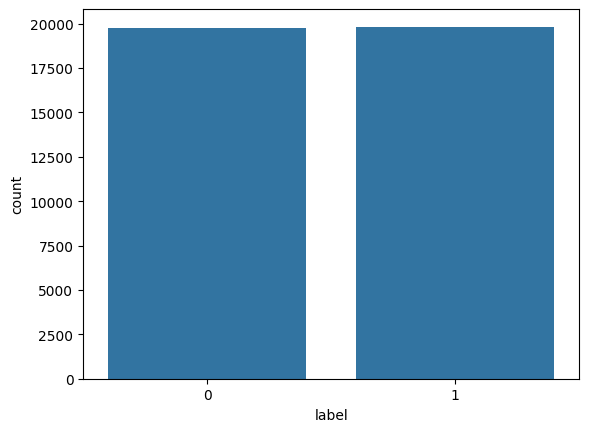

In [28]:
sns.countplot(data=df, x='label')

In [29]:
df['label'].value_counts(normalize=True).mul(100).round(2)

label
1    50.09
0    49.91
Name: proportion, dtype: float64

In [30]:
df['count'] = df['text'].apply(lambda x: len(x.split()))

In [31]:
df['count'].describe()

count    39574.000000
mean       228.911988
std        169.327034
min          4.000000
25%        125.000000
50%        172.000000
75%        278.000000
max       2459.000000
Name: count, dtype: float64

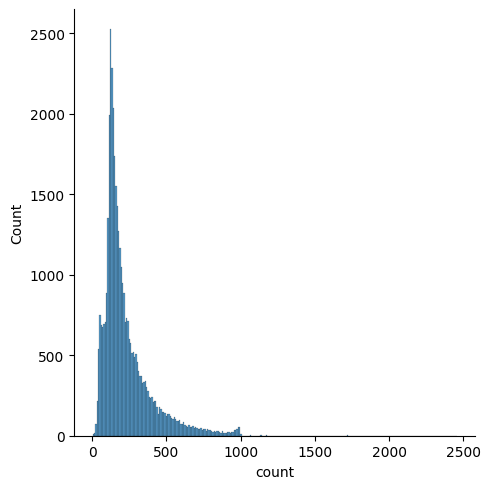

In [32]:
sns.displot(df['count'])

<Axes: ylabel='count'>

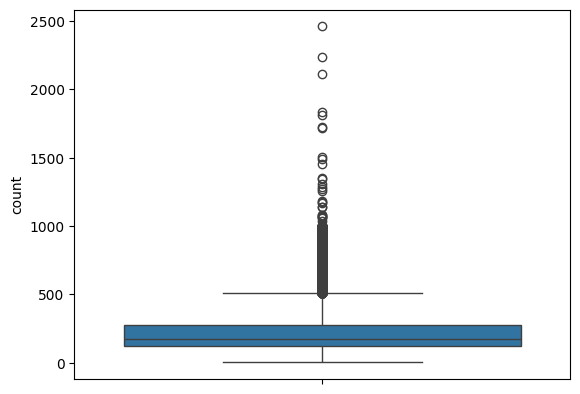

In [33]:
sns.boxplot(data=df['count'])

<Axes: xlabel='label', ylabel='count'>

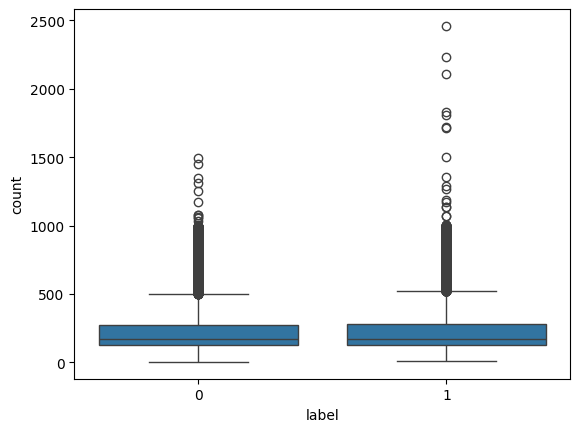

In [34]:
sns.boxplot(data=df, x='label', y='count')

<Axes: xlabel='label', ylabel='count'>

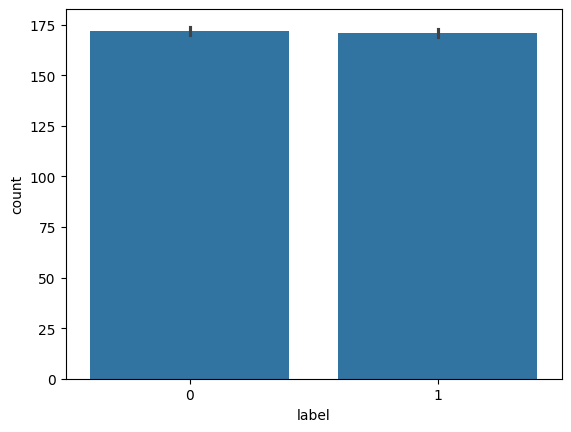

In [35]:
sns.barplot(data=df, x='label', y='count', estimator='median')

In [36]:
from nltk.corpus import stopwords
from string import punctuation

stopword = stopwords.words('english')
words = list(punctuation) + stopword

df['num_stop'] = df['text'].apply(lambda x: len([word for word in x.split() if word in words]))

In [37]:
df.sample(5)

,text,label,count,num_stop
2200,there's a major difference between releasing a...,0,191,82
28464,this was so poor i had to turn it off in the e...,0,63,36
10676,almost no information is available about this ...,1,143,67
13466,"well, what are the odds! at the exact right mo...",0,516,236
33384,"after a man turns up dead, a soldier becomes t...",1,110,45


<Axes: xlabel='num_stop', ylabel='Count'>

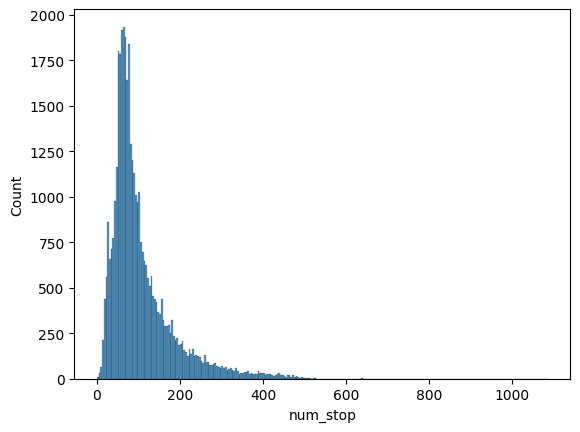

In [38]:
sns.histplot(df['num_stop'])

In [39]:
from collections import Counter

In [40]:
all_stop = [word for comment in df['text'] for word in comment.split() if word in words]

In [41]:
common_stop = Counter(all_stop).most_common(10)

In [42]:
top_10 = pd.DataFrame(common_stop, columns=['stop_word', 'count'])

<Axes: xlabel='count', ylabel='stop_word'>

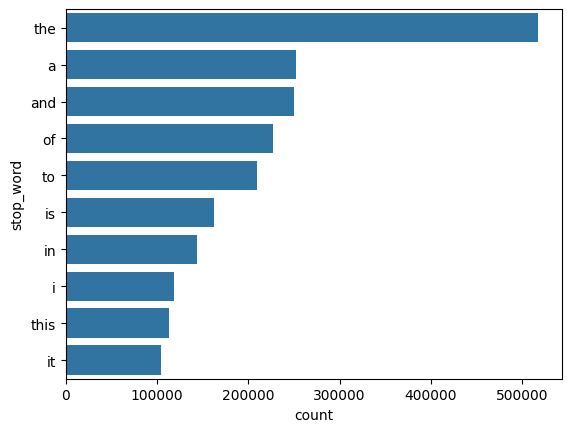

In [43]:
sns.barplot(data=top_10, x='count', y='stop_word')

In [44]:
df['chars'] = df['text'].apply(len)

In [45]:
df.head()

,text,label,count,num_stop,chars
0,i grew up (b. 1965) watching and loving the th...,0,151,64,874
1,"when i put this movie in my dvd player, and sa...",0,324,166,1791
2,why do people who do not know what a particula...,0,184,87,983
3,even though i have great interest in biblical ...,0,69,36,351
4,im a die hard dads army fan and nothing will e...,1,173,71,953


In [46]:
df['chars'].describe()

count    39574.000000
mean      1289.109971
std        971.752293
min         32.000000
25%        690.000000
50%        958.000000
75%       1569.000000
max      13604.000000
Name: chars, dtype: float64

In [47]:
all_text = ' '.join(df['text'])

In [48]:
char_freq = Counter(all_text)

In [49]:
char_df = pd.DataFrame(char_freq.items(), columns=['char', 'freq']).sort_values(by='freq')

In [50]:
char_df['char'].values

array(['¾', 'ı', '\x9a', 'º', 'ż', 'ō', '¦', '¢', 'ר', 'י', '″', 'ג', 'ל',
       'כ', 'א', 'ğ', '³', 'מ', 'ו', 'ן', '¿', '，', '₤', '®', 'þ', '★',
       '\x8d', '§', '¤', 'ò', '°', 'ì', 'õ', '\xad', '、', 'ù', 'û',
       '\uf0b7', '\x80', '¡', 'î', 'ð', 'ß', 'æ', '…', 'ø', '‘', '\x95',
       'ý', '\x8e', '\x9e', 'ú', 'å', 'ë', 'ê', '\x84', '\\', '½', '·',
       'â', '¨', '»', '«', 'ã', 'ï', '”', '\xa0', '“', '|', 'ô', 'ç', 'ñ',
       'à', '\t', '^', 'ä', 'í', 'ü', 'ó', '£', '\x91', '<', '–', '@',
       'ö', 'è', '}', '{', '~', 'á', '[', ']', '’', '>', '´', '\x97', '+',
       '#', '=', '%', '_', '\x85', '$', '`', '\x96', 'é', '6', '&', '7',
       '4', '8', '5', '3', '/', ';', '*', '2', '9', ':', '?', '1', '0',
       'q', 'z', '!', '(', ')', 'x', 'j', '"', '-', "'", 'k', ',', 'v',
       '.', 'b', 'p', 'w', 'y', 'g', 'f', 'u', 'm', 'c', 'd', 'l', 'h',
       'r', 'n', 's', 'o', 'i', 'a', 't', 'e', ' '], dtype=object)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
def top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bow = vec.transform(corpus)
    sum = bow.sum(axis=0)
    word_freq = [(word, sum[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

In [53]:
top_10_bi = top_ngrams(df['text'], 10)

In [54]:
top_10_bi_df = pd.DataFrame(top_10_bi, columns=['bi', 'count'])

<Axes: xlabel='count', ylabel='bi'>

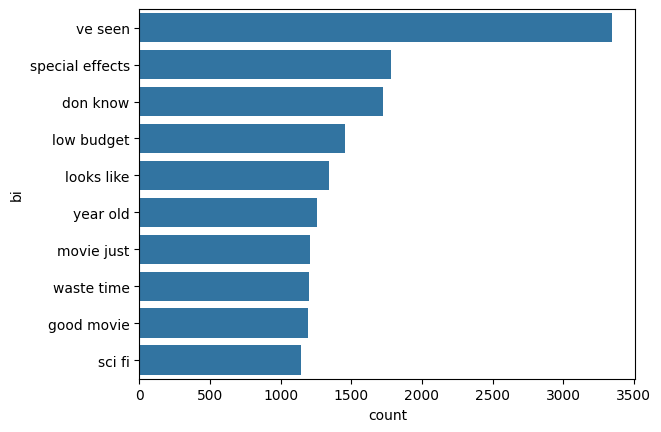

In [55]:
sns.barplot(data=top_10_bi_df, x='count', y='bi')

In [56]:
import re

In [57]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', str(x)))

In [58]:
df.head()

,text,label,count,num_stop,chars
0,i grew up b watching and loving the thunderbi...,0,151,64,874
1,when i put this movie in my dvd player and sat...,0,324,166,1791
2,why do people who do not know what a particula...,0,184,87,983
3,even though i have great interest in biblical ...,0,69,36,351
4,im a die hard dads army fan and nothing will e...,1,173,71,953


In [59]:
df['text'] = df['text'].str.replace('\t', ' ', regex=True)

In [60]:
all_text = ' '.join(df['text'])

In [61]:
char_freq = Counter(all_text)

In [62]:
char_df = pd.DataFrame(char_freq.items(), columns=['char', 'freq']).sort_values(by='freq')

In [63]:
char_df

,char,freq
28,,44
27,,1127
25,q,31653
26,z,35546
24,x,67857
23,j,91775
22,k,351777
17,v,512538
8,b,646139
7,p,691650


In [64]:
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

In [65]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [66]:
df.head()

,text,label,count,num_stop,chars
0,grew b watching loving thunderbirds mates scho...,0,151,64,874
1,put movie dvd player sat coke chips expectatio...,0,324,166,1791
2,people not know particular time past like feel...,0,184,87,983
3,even though great interest biblical movies bor...,0,69,36,351
4,im die hard dads army fan nothing ever change ...,1,173,71,953


In [67]:
from nltk.stem import WordNetLemmatizer

In [68]:
lemmatizer = WordNetLemmatizer()

In [69]:
lemmatizer.lemmatize('mice')

'mouse'

In [70]:
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [71]:
df.head()

,text,label,count,num_stop,chars
0,grew b watching loving thunderbird mate school...,0,151,64,874
1,put movie dvd player sat coke chip expectation...,0,324,166,1791
2,people not know particular time past like feel...,0,184,87,983
3,even though great interest biblical movie bore...,0,69,36,351
4,im die hard dad army fan nothing ever change g...,1,173,71,953


In [72]:
from wordcloud import WordCloud

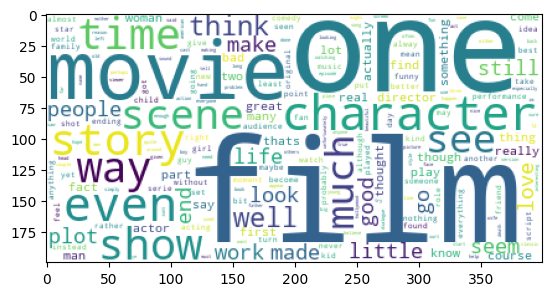

In [73]:
def plot_wc(text):
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.imshow(wordcloud)
    plt.show()

plot_wc(df['text'])

In [74]:
def plot_top_n_label(df, n=10, start=0):
    word_label_count = {}

    # Count word frequencies per label
    for idx, row in df.iterrows():
        words = row['text'].split()
        category = row['label']
        for word in words:
            if word not in word_label_count:
                word_label_count[word] = {0: 0, 1: 0}
            word_label_count[word][category] += 1

    # Total counts
    total_word_count = {word: sum(counts.values()) for word, counts in word_label_count.items()}

    # Sort and slice
    most_common_words = sorted(total_word_count.items(), key=lambda x: x[1], reverse=True)
    top_words = [word for word, _ in most_common_words[start:start + n]]

    # Counts per label
    negative_counts = [word_label_count[word][0] for word in top_words]
    positive_counts = [word_label_count[word][1] for word in top_words]

    # Plot stacked horizontal bars
    plt.barh(top_words, negative_counts, color='red', label='Negative')
    plt.barh(top_words, positive_counts, left=negative_counts, color='green', label='Positive')

    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.legend()
    plt.gca().invert_yaxis()  # so top word appears at the top
    plt.show()


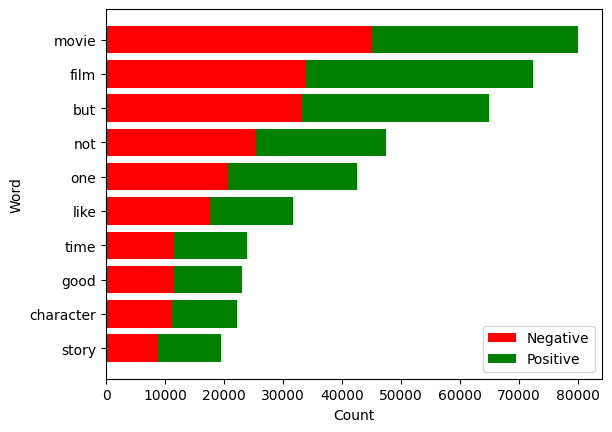

In [75]:
plot_top_n_label(df)

In [76]:
import mlflow

In [77]:
mlflow.set_tracking_uri("http://ec2-13-61-146-35.eu-north-1.compute.amazonaws.com:5000/")

with mlflow.start_run():
    mlflow.log_param("param1", 15)
    mlflow.log_metric("metric1", 0.89)

🏃 View run gaudy-tern-638 at: http://ec2-13-61-146-35.eu-north-1.compute.amazonaws.com:5000/#/experiments/0/runs/42ec0f3db4214ff6afe25e3144584b4a
🧪 View experiment at: http://ec2-13-61-146-35.eu-north-1.compute.amazonaws.com:5000/#/experiments/0


# Baseline Model

In [78]:
import mlflow.sklearn

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
vectorizer = CountVectorizer(max_features= 10000)

In [83]:
x = vectorizer.fit_transform(df['text']).toarray()

In [84]:
y = df['label']

In [86]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(39574, 10000))

In [87]:
x.shape

(39574, 10000)

In [88]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [89]:
y.shape

(39574,)

In [90]:
mlflow.set_tracking_uri("http://ec2-13-61-146-35.eu-north-1.compute.amazonaws.com:5000/")

In [91]:
mlflow.set_experiment("RF_Baseline")

2025/08/16 22:02:58 INFO mlflow.tracking.fluent: Experiment with name 'RF_Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://my-mlflow-bucket-123/492739231133055017', creation_time=1755361985898, experiment_id='492739231133055017', last_update_time=1755361985898, lifecycle_stage='active', name='RF_Baseline', tags={}>

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

2025/08/16 22:48:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/16 22:48:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_Base_Split at: http://ec2-13-61-146-35.eu-north-1.compute.amazonaws.com:5000/#/experiments/492739231133055017/runs/19eb96f0b99b49a6afc54cc3bc15f889
🧪 View experiment at: http://ec2-13-61-146-35.eu-north-1.compute.amazonaws.com:5000/#/experiments/492739231133055017
AccuracyL 0.8376500315855969


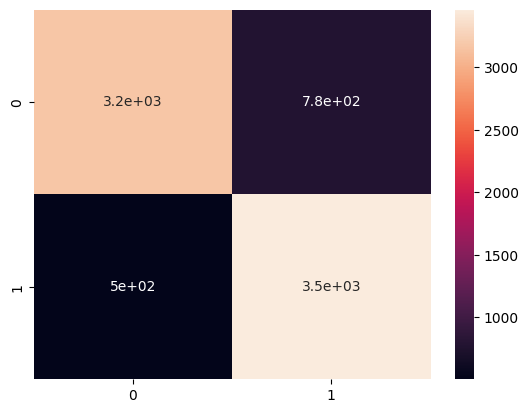

In [97]:
with mlflow.start_run() as run:
    mlflow.set_tag("mlflow.runName", "RF_Base_Split")
    mlflow.set_tag("experiment_type", "Base")
    mlflow.set_tag("model_type", "RandomForestClassifier")

    mlflow.set_tag("description", "Baseline RF model for sentiment analysis using BoW")

    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    n_estimators = 200
    max_depth = 15

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True)

    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    mlflow.sklearn.log_model(model, "random_forest_model")

    df.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("dataset.csv")

print(f"AccuracyL {accuracy}")

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3950
           1       0.82      0.87      0.84      3965

    accuracy                           0.84      7915
   macro avg       0.84      0.84      0.84      7915
weighted avg       0.84      0.84      0.84      7915



In [99]:
mlflow.set_experiment("BoW v/s TFIdf")

2025/08/17 00:34:33 INFO mlflow.tracking.fluent: Experiment with name 'BoW v/s TFIdf' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://my-mlflow-bucket-123/734492199182626374', creation_time=1755371081657, experiment_id='734492199182626374', last_update_time=1755371081657, lifecycle_stage='active', name='BoW v/s TFIdf', tags={}>

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [102]:
df = pd.read_csv("dataset.csv")

In [104]:
df.shape

(39574, 5)

In [103]:
df.head()

,text,label,count,num_stop,chars
0,grew b watching loving thunderbird mate school...,0,151,64,874
1,put movie dvd player sat coke chip expectation...,0,324,166,1791
2,people not know particular time past like feel...,0,184,87,983
3,even though great interest biblical movie bore...,0,69,36,351
4,im die hard dad army fan nothing ever change g...,1,173,71,953
